<a href="https://colab.research.google.com/github/Nico-GP/Coding-Dojo_Track2/blob/main/Week8/Customer_Segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO**: Custumer Segment
## Creado por: Nicolas Gonzalez
### Descripcion: segmentacion de clientes segun caracteristicas
* Creado: 20/02/22
* Ultima Actualizacion: 20/02/22

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import pandas as pd
cs = pd.read_csv('/content/drive/My Drive/CodingDojo/Week8/cust_seg.csv')
cs.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


Se establece la columna "Customer Id" como indice

In [55]:
cs.set_index('Customer Id', inplace = True)
cs.head(1)

,Unnamed: 0,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,,
1,0,41,2,6,19,0.124,1.073,0.0,6.3


Se elimina la columna "Unnamed: 0"

In [56]:
cs.drop(columns = 'Unnamed: 0', inplace = True)
cs.head(1)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3


informacion sobre la base de datos

In [57]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


Valores faltantes

In [58]:
cs.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [59]:
(cs.isnull().sum()/len(cs))*100

Age                 0.000000
Edu                 0.000000
Years Employed      0.000000
Income              0.000000
Card Debt           0.000000
Other Debt          0.000000
Defaulted          17.647059
DebtIncomeRatio     0.000000
dtype: float64

Se eliminan las filas con valores faltantes en la columna "Dafaulted" por no tener contexto al respecto

In [60]:
cs.dropna(inplace = True)

# Kmeans

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Se escala la base de datos

In [62]:
scaler = StandardScaler()
cs_sc = scaler.fit_transform(cs)

Se llama a KMeans asumiendo 4 segmentos de clientes

In [63]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(cs_sc)

KMeans(n_clusters=4)

Se guardan las clasificaciones como una nueva columna "Clusters"

In [64]:
cs['Cluster'] = kmeans.labels_
cs.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,0
2,47,1,26,100,4.582,8.218,0.0,12.8,1
3,33,2,10,57,6.111,5.802,1.0,20.9,3
4,29,2,4,19,0.681,0.516,0.0,6.3,0
5,47,1,31,253,9.308,8.908,0.0,7.2,2


# Visualizacion

Distribucion de segmento de clientes en años de educacion vs ingresos

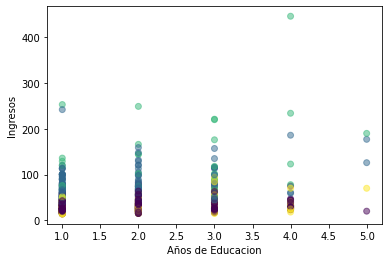

In [65]:
plt.scatter(cs['Edu'], cs['Income'], c = cs['Cluster'],alpha = 0.5);
plt.xlabel('Años de Educacion');
plt.ylabel('Ingresos');

Distribucion de segmento de clientes en edad vs ingresos

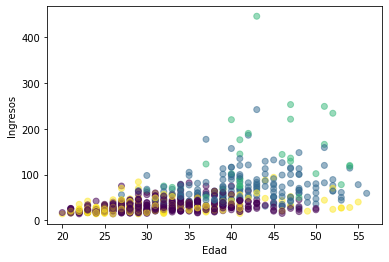

In [66]:
plt.scatter(cs['Age'], cs['Income'], c = cs['Cluster'], alpha = 0.5);
plt.xlabel('Edad');
plt.ylabel('Ingresos');

Distribucion de segmento de clientes en deuda de tarjetas vs otras deudas

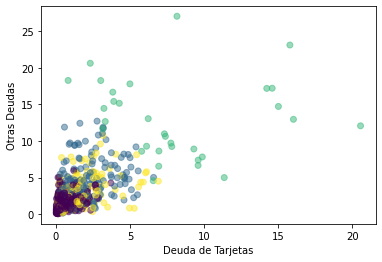

In [67]:
plt.scatter(cs['Card Debt'], cs['Other Debt'], c = cs['Cluster'], alpha = 0.5);
plt.xlabel('Deuda de Tarjetas');
plt.ylabel('Otras Deudas');

Distribucion de segmento de clientes en años de empleo vs ingresos

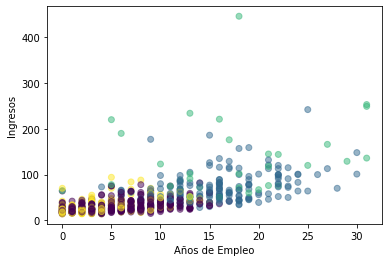

In [68]:
plt.scatter(cs['Years Employed'], cs['Income'], c = cs['Cluster'], alpha = 0.5);
plt.xlabel('Años de Empleo');
plt.ylabel('Ingresos');

Distribucion de segmento de clientes en ingresos vs proporcion ingresos-deuda

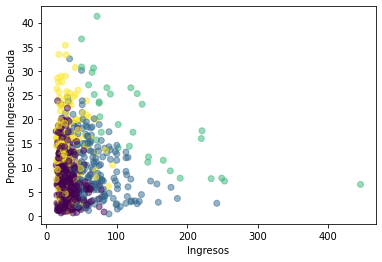

In [69]:
plt.scatter(cs['Income'], cs['DebtIncomeRatio'], c = cs['Cluster'], alpha = 0.5);
plt.xlabel('Ingresos');
plt.ylabel('Proporcion Ingresos-Deuda');

# Estadistica

Cantidad de valores por segmento de cliente

In [72]:
cs['Cluster'].value_counts()

0    334
1    170
3    164
2     32
Name: Cluster, dtype: int64

Informacion estadistica sobre segmentos de clientes

In [86]:
segmento1 = cs[cs['Cluster'] == 0]
segmento2 = cs[cs['Cluster'] == 1]
segmento3 = cs[cs['Cluster'] == 2]
segmento4 = cs[cs['Cluster'] == 3]

segmentos = [segmento1, segmento2, segmento3, segmento4]

for segmento in segmentos:
  print(segmento.describe().T)

                 count       mean        std  ...      50%      75%     max
Age              334.0  32.239521   6.354124  ...  31.0000  36.0000  50.000
Edu              334.0   1.640719   0.895243  ...   1.0000   2.0000   5.000
Years Employed   334.0   5.943114   3.976628  ...   6.0000   9.0000  17.000
Income           334.0  30.928144  12.265858  ...  28.0000  37.0000  82.000
Card Debt        334.0   0.667395   0.614068  ...   0.4635   0.9165   3.703
Other Debt       334.0   1.554440   1.055252  ...   1.2635   2.1310   5.960
Defaulted        334.0   0.000000   0.000000  ...   0.0000   0.0000   0.000
DebtIncomeRatio  334.0   7.590120   4.676199  ...   6.6500  10.2750  23.800
Cluster          334.0   0.000000   0.000000  ...   0.0000   0.0000   0.000

[9 rows x 8 columns]
                 count       mean        std  ...      50%      75%      max
Age              170.0  41.600000   5.989537  ...  41.0000  46.0000   56.000
Edu              170.0   1.611765   0.864748  ...   1.0000   2.0

Marco de datos para visualizar promedios

In [91]:
promedio_edad = [np.mean(segmento['Age']) for segmento in segmentos]
promedio_ingreso = [np.mean(segmento['Income']) for segmento in segmentos]
promedio_deudaingreso = [np.mean(segmento['DebtIncomeRatio']) for segmento in segmentos]

In [93]:
promedios_cs = pd.DataFrame({'Segmento de Cliente' : ['segmento1', 'segmento2', 'segmento3', 'segmento4'],
                             'Edad Promedio' : promedio_edad,
                             'Ingresos Promedio' : promedio_ingreso,
                             'Proporcion Deuda-Ingresos' : promedio_deudaingreso})

Grafico de edad promedio por segmento de cliente

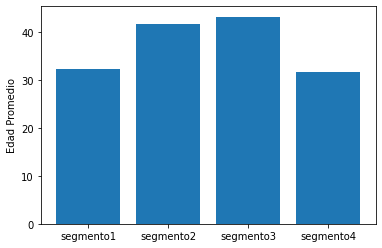

In [99]:
plt.bar(promedios_cs['Segmento de Cliente'], promedios_cs['Edad Promedio']);
plt.ylabel('Edad Promedio');

Grafico de ingresos promedio por segmento de cliente

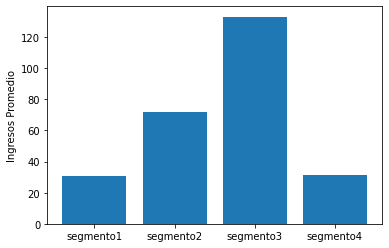

In [101]:
plt.bar(promedios_cs['Segmento de Cliente'], promedios_cs['Ingresos Promedio']);
plt.ylabel('Ingresos Promedio');

Grafico de proporcion deuda-ingresos promedio por segmento de cliente

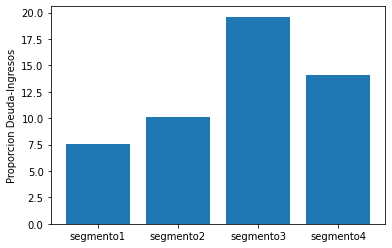

In [102]:
plt.bar(promedios_cs['Segmento de Cliente'], promedios_cs['Proporcion Deuda-Ingresos']);
plt.ylabel('Proporcion Deuda-Ingresos');